## Generate platemap(s) for batch of processes data with percentage of image sets failed

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(patchwork))

Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”


In [2]:
# Set the name of batch being processed
batch_name <- "platemap_11"

# Output directory for the plots
output_directory <- file.path("./qc_plots", batch_name)
# Create the output directory if it doesn't exist
if (!dir.exists(output_directory)) {
  dir.create(output_directory, recursive = TRUE)
}

# Define the directory containing the folders for each plate
qc_results <- paste0("./qc_results/", batch_name)

# List all CSV files in the directory and its subdirectories
csv_files <- list.files(qc_results, pattern = "\\Image.csv$", full.names = TRUE, recursive = TRUE)

# Read and concatenate all CSV files, updating Metadata_Plate to match folder name
illum_data <- bind_rows(lapply(csv_files, function(file) {
  df <- read.csv(file)
  
  # Extract plate name from folder
  plate_name <- basename(dirname(file))
  
  # Warn if Metadata_Plate is inconsistent
  if (!all(df$Metadata_Plate == plate_name)) {
    warning(paste0("Metadata_Plate mismatch in file: ", file, 
                   ". Updating to folder name '", plate_name, "'"))
  }
  
  # Update Metadata_Plate to match folder
  df$Metadata_Plate <- plate_name
  
  return(df)
}))

# Display the first few rows of the concatenated data
head(illum_data)


,ExecutionTime_01Images,ExecutionTime_02Metadata,ExecutionTime_03NamesAndTypes,ExecutionTime_04Groups,ExecutionTime_05MeasureImageQuality,ExecutionTime_06FlagImage,FileName_OrigActin,FileName_OrigDNA,FileName_OrigER,FileName_OrigMito,⋯,URL_OrigActin,URL_OrigDNA,URL_OrigER,URL_OrigMito,URL_OrigPM,Width_OrigActin,Width_OrigDNA,Width_OrigER,Width_OrigMito,Width_OrigPM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,0,0,2.50,0,4.68,0.02,CARD-CelIns-CX7_260113180001_B02f00d0.TIF,CARD-CelIns-CX7_260113180001_B02f00d4.TIF,CARD-CelIns-CX7_260113180001_B02f00d3.TIF,CARD-CelIns-CX7_260113180001_B02f00d1.TIF,⋯,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f00d0.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f00d4.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f00d3.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f00d1.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f00d2.TIF,1104,1104,1104,1104,1104
2,0,0,2.35,0,5.18,0.02,CARD-CelIns-CX7_260113180001_B02f01d0.TIF,CARD-CelIns-CX7_260113180001_B02f01d4.TIF,CARD-CelIns-CX7_260113180001_B02f01d3.TIF,CARD-CelIns-CX7_260113180001_B02f01d1.TIF,⋯,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f01d0.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f01d4.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f01d3.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f01d1.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f01d2.TIF,1104,1104,1104,1104,1104
3,0,0,2.18,0,5.49,0.01,CARD-CelIns-CX7_260113180001_B02f02d0.TIF,CARD-CelIns-CX7_260113180001_B02f02d4.TIF,CARD-CelIns-CX7_260113180001_B02f02d3.TIF,CARD-CelIns-CX7_260113180001_B02f02d1.TIF,⋯,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f02d0.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f02d4.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f02d3.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f02d1.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f02d2.TIF,1104,1104,1104,1104,1104
4,0,0,1.42,0,4.45,0.01,CARD-CelIns-CX7_260113180001_B02f03d0.TIF,CARD-CelIns-CX7_260113180001_B02f03d4.TIF,CARD-CelIns-CX7_260113180001_B02f03d3.TIF,CARD-CelIns-CX7_260113180001_B02f03d1.TIF,⋯,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f03d0.TIF,file:/media/18tbdrive/CFReT_screening_data/compound_screen/batch_3/platemap_11/11a/CARD-CelIns-CX7_260113180001/CARD-CelIns-CX7_260113180001_B02f03d4.TIF,file:/media/18tbdrive/CFReT_screening_data/c

In [3]:
well_qc_data <- illum_data %>%
  mutate(Failing_FOV = (Metadata_Blur_Flag == 1 | Metadata_Saturation_Flag == 1)) %>%
  group_by(Metadata_Plate, Metadata_Well) %>%
  summarise(
    Total_FOVs = n(),
    Count_Failing = sum(Failing_FOV),
    Percent_Failing = 100 * Count_Failing / Total_FOVs,
    .groups = "drop"
  )

# Add Metadata_treatment information based on Metadata_Well
control_wells <- c("B02", "B05", "B08", "B11", "E02", "E05", "E08", "E11")
well_qc_data <- well_qc_data %>%
  mutate(Metadata_treatment = ifelse(Metadata_Well %in% control_wells, "control", "compound"))

head(well_qc_data)


Metadata_Plate,Metadata_Well,Total_FOVs,Count_Failing,Percent_Failing,Metadata_treatment
<chr>,<chr>,<int>,<int>,<dbl>,<chr>
CARD-CelIns-CX7_260113180001,B02,25,5,20,control
CARD-CelIns-CX7_260113180001,B03,25,4,16,compound
CARD-CelIns-CX7_260113180001,B04,25,2,8,compound
CARD-CelIns-CX7_260113180001,B05,25,1,4,control
CARD-CelIns-CX7_260113180001,B06,25,6,24,compound
CARD-CelIns-CX7_260113180001,B07,25,1,4,compound


In [4]:
library(dplyr)
library(stringr)

# Use the actual plate names in well_qc_data
unique_plates <- unique(well_qc_data$Metadata_Plate)

# Extract numeric part for sorting (handles leading zeros)
plate_numbers <- str_extract(unique_plates, "(?<=CARD-CelIns-CX7)\\d+") %>%
    as.numeric()

# Order by numeric value
sorted_indices <- order(plate_numbers)
old_names <- unique_plates[sorted_indices]

# New names
new_names <- paste0("Plate_", seq_along(old_names))

# Create a mapping and update well_qc_data
plate_mapping <- setNames(new_names, old_names)

well_qc_data <- well_qc_data %>%
    mutate(Metadata_Plate = recode(Metadata_Plate, !!!plate_mapping))

# Check
unique(well_qc_data$Metadata_Plate)
head(well_qc_data)


[1] "Plate_1" "Plate_2" "Plate_3" "Plate_4"

Metadata_Plate,Metadata_Well,Total_FOVs,Count_Failing,Percent_Failing,Metadata_treatment
<chr>,<chr>,<int>,<int>,<dbl>,<chr>
Plate_1,B02,25,5,20,control
Plate_1,B03,25,4,16,compound
Plate_1,B04,25,2,8,compound
Plate_1,B05,25,1,4,control
Plate_1,B06,25,6,24,compound
Plate_1,B07,25,1,4,compound


Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


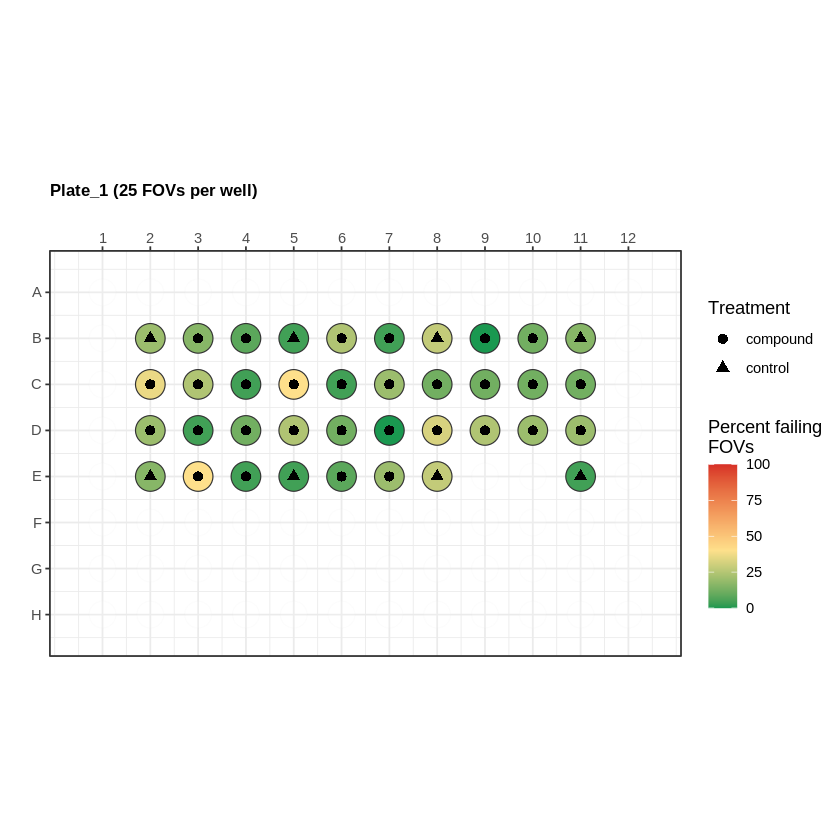

Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


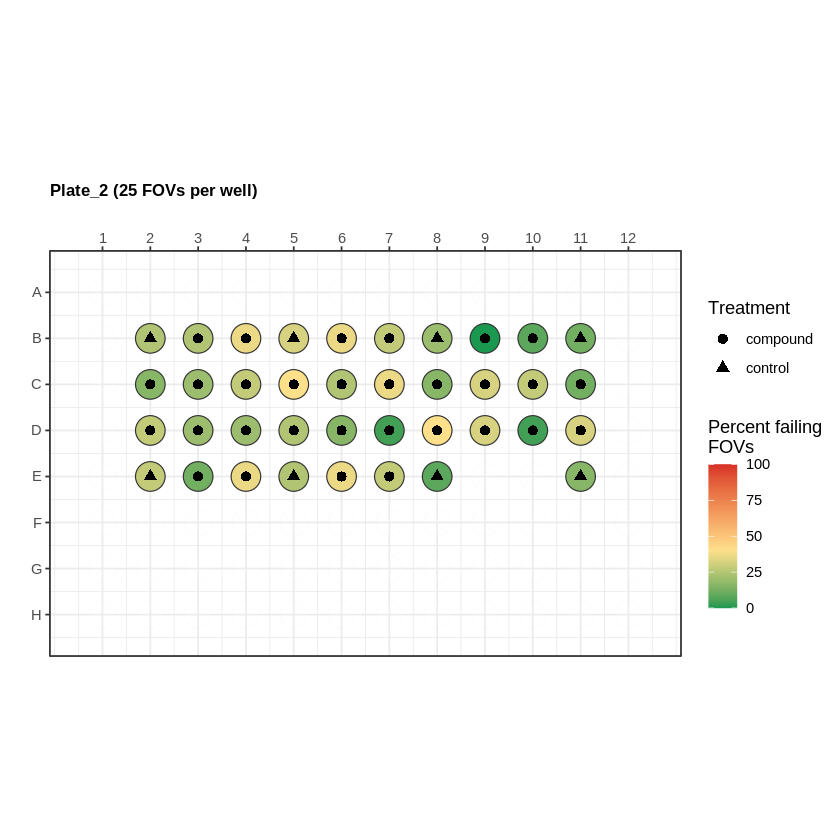

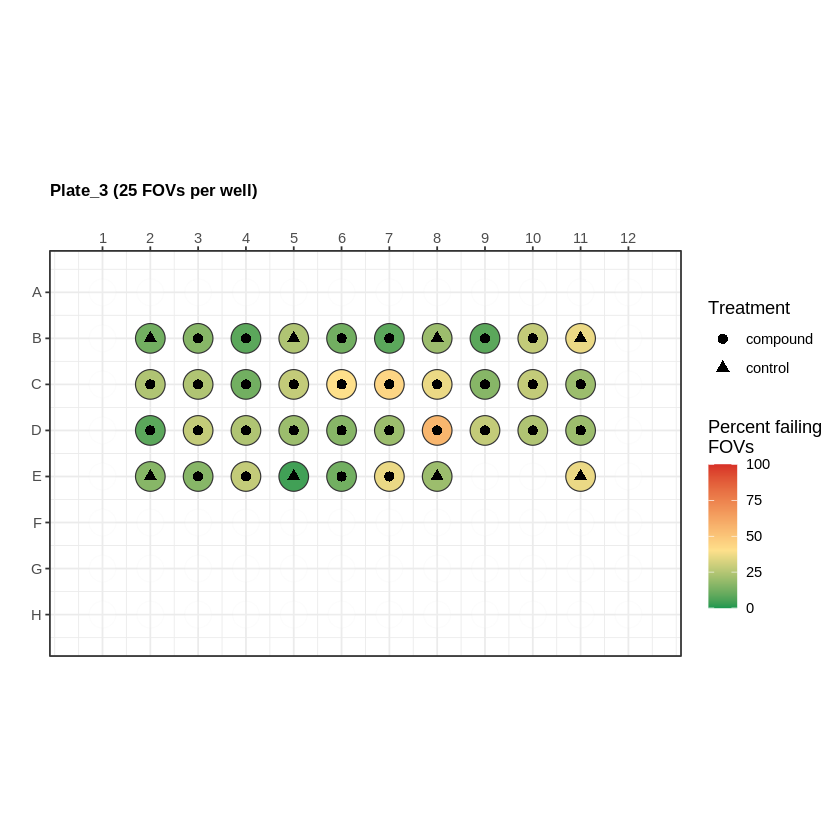

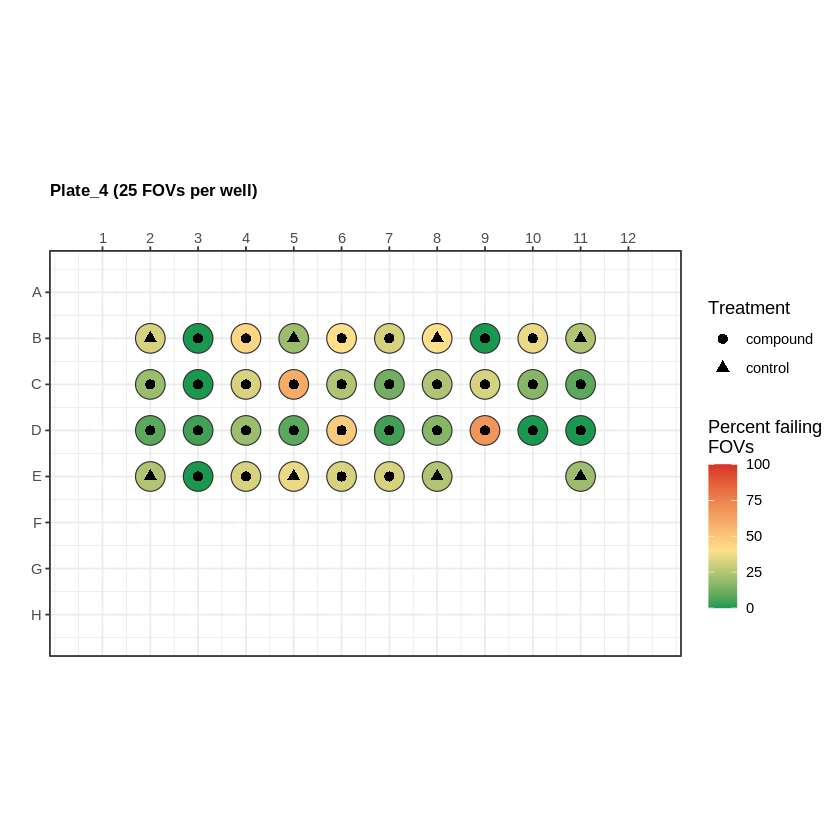

In [5]:
# Generate platemaps for each Plate
unique_plates <- unique(well_qc_data$Metadata_Plate)

for (plate in unique_plates) {
    plate_data <- well_qc_data %>%
        filter(Metadata_Plate == plate)

    fov_platemap <- platetools::raw_map(
        data = plate_data$Percent_Failing,
        well = plate_data$Metadata_Well,
        plate = 96,
        size = 8
    ) +
        ggtitle(paste(plate, "(25 FOVs per well)")) +
        theme(plot.title = element_text(size = 10, face = "bold")) +
        scale_fill_gradientn(
            name = "Percent failing\nFOVs",
            colors = c("#1a9850", "#fee08b", "#d73027"), # green → yellow → red
            values = scales::rescale(c(0, 40, 100)),
            limits = c(0, 100)
        ) +
        geom_point(aes(shape = plate_data$Metadata_treatment), size = 2.5) +
        scale_shape_discrete(name = "Treatment")

    print(fov_platemap)
}


Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


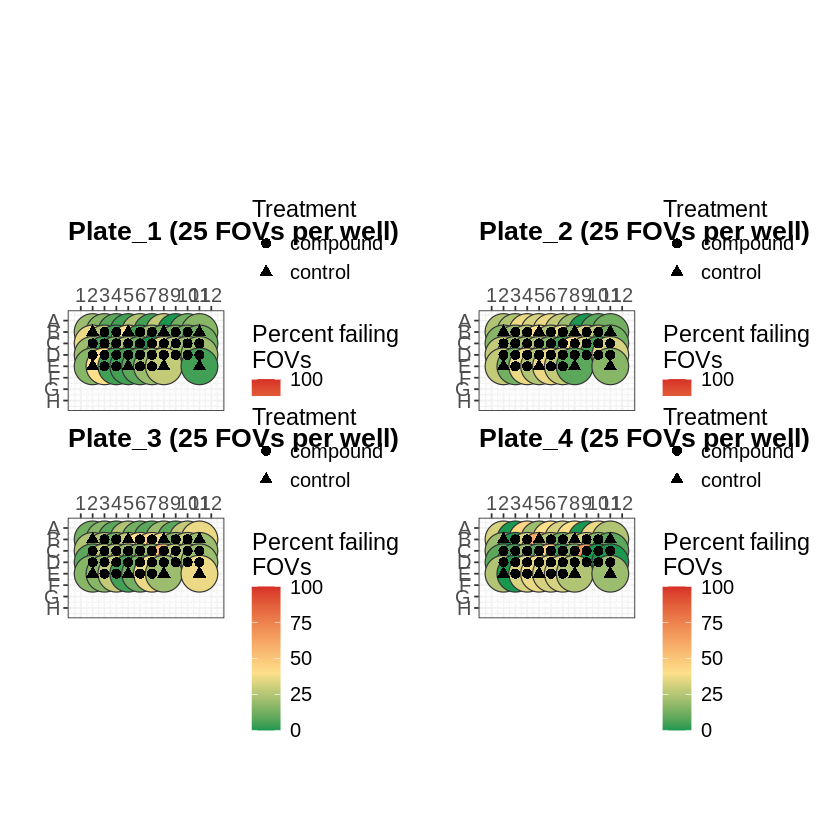

In [6]:
# Generate platemaps for each Plate
unique_plates <- unique(well_qc_data$Metadata_Plate)

# Create a list to store the plots
plate_plots <- lapply(unique_plates, function(plate) {
    plate_data <- well_qc_data %>%
        filter(Metadata_Plate == plate)

    platemap <- platetools::raw_map(
        data = plate_data$Percent_Failing,
        well = plate_data$Metadata_Well,
        plate = 96,
        size = 10
    ) +
        ggtitle(paste(plate, "(25 FOVs per well)")) +
        theme(plot.title = element_text(size = 10, face = "bold")) +
        scale_fill_gradientn(
            name = "Percent failing\nFOVs",
            colors = c("#1a9850", "#fee08b", "#d73027"),
            values = scales::rescale(c(0, 40, 100)),
            limits = c(0, 100)
        )+
        geom_point(aes(shape = plate_data$Metadata_treatment), size = 2.5) +
        scale_shape_discrete(name = "Treatment" ) +
        theme(
            plot.title = element_text(size = 16),
            legend.title = element_text(size = 14),
            legend.text = element_text(size = 12),
            axis.text = element_text(size = 12),
            axis.title = element_text(size = 14),
        )
    
    return(platemap)
})

# Combine all plots in a 2x2 grid
combined_plot <- wrap_plots(plate_plots, ncol = 2)
combined_plot

# Save the combined plot to a file
ggsave(filename = file.path(output_directory, paste0(batch_name, "_per_plate_fov_platemaps.png")),
       plot = combined_plot,
       width = 15, height = 9, dpi = 600)


In [7]:
merged_well_qc_data <- illum_data %>%
  mutate(Failing_FOV = (Metadata_Blur_Flag == 1 | Metadata_Saturation_Flag == 1)) %>%
  group_by(Metadata_Well) %>%
  summarise(
    Total_FOVs = n(),
    Count_Failing = sum(Failing_FOV),
    Percent_Failing = 100 * Count_Failing / Total_FOVs,
    .groups = "drop"
  )

head(merged_well_qc_data)


Metadata_Well,Total_FOVs,Count_Failing,Percent_Failing
<chr>,<int>,<int>,<dbl>
B02,100,22,22
B03,100,14,14
B04,100,24,24
B05,100,20,20
B06,100,28,28
B07,100,18,18


In [8]:
# Extract the plate number from your batch_name
plate_number <- sub("platemap_", "", batch_name)

# Construct the correct platemap filename
platemap_file <- paste0("../../metadata/original_platemaps/Target_Selective_Library_Screen_Plate_", plate_number, ".csv")

# Read in the platemap
platemap_data <- read.csv(platemap_file)

merged_well_qc_data <- illum_data %>%
  mutate(Failing_FOV = (Metadata_Blur_Flag == 1 | Metadata_Saturation_Flag == 1)) %>%
  group_by(Metadata_Well) %>%
  summarise(
    Total_FOVs = n(),
    Count_Failing = sum(Failing_FOV),
    Percent_Failing = 100 * Count_Failing / Total_FOVs,
    .groups = "drop"
  )

# Merge with the well QC data via well_position and only include treatment column
merged_well_qc_data <- merged_well_qc_data %>%
  inner_join(platemap_data %>% select(well_position, treatment), 
             by = c("Metadata_Well" = "well_position"))

# Update treatment column to be either control if DMSO or if UCD- prefix then compound
merged_well_qc_data <- merged_well_qc_data %>%
  mutate(treatment = ifelse(treatment == "DMSO", "control",
                            ifelse(startsWith(treatment, "UCD-"), "compound", treatment)))

head(merged_well_qc_data)


Metadata_Well,Total_FOVs,Count_Failing,Percent_Failing,treatment
<chr>,<int>,<int>,<dbl>,<chr>
B02,100,22,22,control
B03,100,14,14,compound
B04,100,24,24,compound
B05,100,20,20,control
B06,100,28,28,compound
B07,100,18,18,compound


Warning message:
“Warning: Your well label count ( 38 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


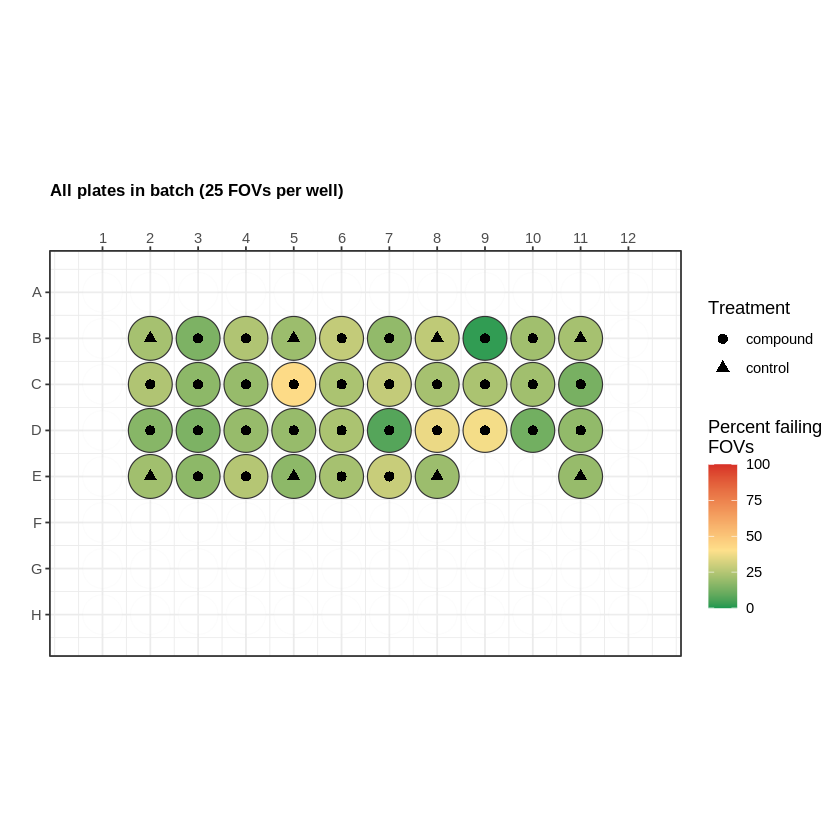

In [9]:
merged_fov_platemap <- platetools::raw_map(
    data = merged_well_qc_data$Percent_Failing,
    well = merged_well_qc_data$Metadata_Well,
    plate = 96,
    size = 12
) +
    ggtitle(paste("All plates in batch (25 FOVs per well)")) +
    theme(plot.title = element_text(size = 10, face = "bold")) +
    scale_fill_gradientn(
        name = "Percent failing\nFOVs",
        colors = c("#1a9850", "#fee08b", "#d73027"), # green → yellow → red
        values = scales::rescale(c(0, 40, 100)),
        limits = c(0, 100)
    ) +
    geom_point(aes(shape = merged_well_qc_data$treatment), size = 2.5) +
    scale_shape_discrete(name = "Treatment", guide = guide_legend(override.aes = list(size = 2.5)))

# Save the merged plot to the output directory, including the batch name in the filename
output_file_merged <- file.path(output_directory, paste0("merged_", batch_name, "_fov_platemap.png"))
ggsave(output_file_merged, plot = merged_fov_platemap, width = 8, height = 6)

print(merged_fov_platemap)
